# Interactividad con Collbacks y Componentes

Convierta sus aplicaciones de Dash en experiencias impulsadas por el usuario al dominar los componentes interactivos. Aprenda a incluir menús despegables, selectores de fechas y campos de texto sin eventos para modificar elementos en sus aplicaciones Dash y crear tableros de autoservicio que sus usuarios puedan explorar.

## Devoluciones de llamada en Dash

Comencemos a hacer que nuestras aplicaciones de Dash sean interactivas usando devoluciones de llamada.

### ¿Qué son las devoluciones de llamada?

En Dash, las devoluciones de llamadas son funciones definidas dentro de una aplicación que se activan con la interacción del usuario. Especificamente, un usuario interactúa con un elemento que activa una función de Python, y esta función provocará un cambio en la aplicación. Esto nos permite crear experiencias de usuarios interactivas dentro de nuestras aplicaciones.

Veamos una devolución de llamada en Dash. Comenzamos con el decorador @app.callback(). Un decorador en un objeto avanzado en Python que está más allá del alcance de este curso. Cubriremos lo que necesita saber para usar el especificado relevante para Dash. Dentro del decorador, hay dos elementos.

- Salida (Output): define que componente se cambiara utilizando el valor devuelto de la función activada. Especificamente, la propiedad de identificación del componente identifica el componente que se actualizará y la propiedad del componente define exactamente qué se actualizará en ese componente. Aquí tenemos un gráfico comn una identificación de my_plot , y actualizaremos el atributo de la figura. La entrada es lo que activa la devolución de llamada, identificada de manera similar por la propiedad de identificación del componente.







In [39]:
from google.colab import files
uploaded = files.upload()

Saving ecom_sales.csv to ecom_sales (3).csv


In [ ]:
pip install dash

In [40]:
from dash import Dash, dcc, html, Input, Output, callback
import plotly.express as px

import pandas as pd

df = pd.read_csv('ecom_sales.csv')

app = Dash(__name__)

app.layout = html.Div(children = [
    # Menú Despegable
    dcc.Dropdown(id = "title_dd",
                 options=[{"label":"Title 1",
                           "value":"Title 1"},
                          {"label":"Title 2",
                           "value":"Title 2"}]),
    dcc.Graph(id="my_graph")
])

# Devolución  de llamada
@app.callback(
    Output('my_graph', 'figure'),
    Input('title_dd', 'value'))

# Función de actualización de gráfico.
def update_plot(selection):
  title = "None Selected"
  if selection:
    title = selection
  bar_fig = px.bar(
      data_frame = df,
      title = f"{title}",
      x = "Quantity", y = "Country"
  )
  return bar_fig

if __name__ == '__main__':
    app.run(port = 2274)

<IPython.core.display.Javascript object>

- `Entrada (Input):` La entrada es lo que activa la devolución de llamada, identificada de manera similar
por la propiedad de identificación  del componente

## Menús despegables en Dash

Un menu despegable en Dash contiene una lista de opciones que los usuarios pueden seleccionar. Se construye de una lista de diccionarios con una etiqueta y un valor. La etiqueta es lo que ve el usuario y el valopr es lo que se envia a una devolución de llamada. Tal como se muestra en el bloque de código anterior.

El ejemplo anterior, es un caso despegable completo en acción. Comenzamos con el diseño de la aplicación con el que estamos familiarizados. Dentro colocamos nuestro menú despegable. Tenga en cuenta que el `id`, `title_dd`, es vital para vincularlo a nuestra función de devolución de llamada. Agregamos el gráfico que deseamos cambiar al diseño de la aplicación. Tenga en cuenta que no ponemos la figura en sí aquí, como lo hemos hecho anteriormente. Ahora, agregamos la devolución de llamada. La salida será el argumento de la figura del gráfico que acabamos de configurar, vinculado con la misma identificación; `my_grafico`. Los enlaces de entrada al menu despegable que creamos a través de la id, title_dd, y nos permite extraer el valor asociado con la opción seleccionada. Inmediatamente debajo del decorador de devolución de llamada se encuentra la función de actualización de gráficos. En realida, esto se ejecutará una vez que se cargue, por lo que debemos establecer un valor predeterminado. La instrucción if se activará cuando un usuario seleccione el menú despegable. Ahora el trabajo esta hecho. El valor de la selección esta disponible como una variable de Python, que se convierte en el título de gráfico de barras. Finalmente, se devuelve el gráfico de barras, que activa la parte de salida de devolución de llamada y actualiza el componente de gráfico en el diseño.

## Despegable como filtro

Un caso de uso más común para los menús despegables es filtrar el marco de datos que admite un gráfico. Veamos un ejemplo codificado para filtrar la columna País de nuestro marco de datos `ecom_sales`. Notará que debajo del decorador, tenemos nuestra función de actualización familiar y establecemos un valor predeterminado para la primera ejecución. Siempre que esté filtrando las devoluciones de llamada, es importante hacer una copia; de lo contrario, los subconjuntos futuros no funcionarán. Nuestra declaración if ahora filtra el DataFrame solo a lo que el usuario seleccionó. Como antes, creamos la figura y la devolvemos.

In [41]:
from dash import Dash, dcc, html, Input, Output, callback
import plotly.express as px

import pandas as pd

df = pd.read_csv('ecom_sales.csv')

app = Dash(__name__)

app.layout = html.Div(children = [
    # Menú Despegable
    dcc.Dropdown(id = "title_dd",
                 options=[{"label":"Title 1",
                           "value":"Title 1"},
                          {"label":"Title 2",
                           "value":"Title 2"}]),
    dcc.Graph(id="my_graph")
])

# Devolución  de llamada
@app.callback(
    Output('my_graph', 'figure'),
    Input('title_dd', 'value'))

# Función de actualización de gráfico.
def update_plot(input_country):
  country = "All Counstries"
  sales = df.copy(deep=True)
  if input_country:
    country = input_country
    sales = sales[sales["Country"] == input_country]

  bar_fig = px.bar(
      data_frame = sales, title = f"Sales in {country}",
      x = "Quantity", y = "Country"
  )
  return bar_fig

if __name__ == '__main__':
    app.run(port = 2275)

<IPython.core.display.Javascript object>

In [42]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd
from dash.dependencies import Input, Output
ecom_sales = pd.read_csv('ecom_sales.csv')
logo_link = 'https://assets.datacamp.com/production/repositories/5893/datasets/fdbe0accd2581a0c505dab4b29ebb66cf72a1803/e-comlogo.png'

app = dash.Dash(__name__)

app.layout = html.Div([
  html.Img(src=logo_link,style={'margin':'30px 0px 0px 0px' }),
  html.H1('Sales breakdowns'),
  html.Div(
    children=[
    html.Div(
        children=[
        html.H2('Controls'),
        html.Br(),
        html.H3('Country Select'),
        # Add a dropdown with identifier
        dcc.Dropdown(id='country_dd',
        # Set the available options with noted labels and values
        options=[
            {'label':'UK', 'value':'United Kingdom'},
            {'label':'GM', 'value':'Germany'},
            {'label':'FR', 'value':'France'},
            {'label':'AUS', 'value':'Australia'},
            {'label':'HK', 'value':'Hong Kong'}],
            style={'width':'200px', 'margin':'0 auto'})
        ],
        style={'width':'350px', 'height':'350px', 'display':'inline-block', 'vertical-align':'top', 'border':'1px solid black', 'padding':'20px'}),
    html.Div(children=[
            # Add a graph component with identifier
            dcc.Graph(id='description'),
            html.H2('Major Category',
            style={ 'border':'2px solid black', 'width':'200px', 'margin':'0 auto'})
            ],
             style={'width':'700px','display':'inline-block'}
             ),
    ])],
  style={'text-align':'center', 'display':'inline-block', 'width':'100%'}
  )

@app.callback(
    # Set the input and output of the callback to link the dropdown to the graph
    Output(component_id='description', component_property='figure'),
    Input(component_id='country_dd', component_property='value')
)

def update_plot(input_country):
    country_filter = 'All Countries'
    sales = ecom_sales.copy(deep=True)
    if input_country:
        country_filter = input_country
        sales = sales[sales['Country'] == country_filter]
    ecom_bar_major_cat = sales.groupby('Description')['OrderValue'].agg('sum').reset_index(name='Quantity')
    bar_fig_major_cat = px.bar(
        title=f'Sales in {country_filter}', data_frame=ecom_bar_major_cat, x='Quantity', y='Description', color='Description',
                 color_discrete_map={'Clothes':'blue','Kitchen':'red','Garden':'green','Household':'yellow'})
    return bar_fig_major_cat

if __name__ == '__main__':
    app.run(port = 2276)

<IPython.core.display.Javascript object>

## Componentes Interactivos

Mejoremos aún más la interactividad de nuestras aplicaciones Dash con más componentes interactivos.

Dash tiene un variedad de componentes interactivos utiles que pueden mejorar la usabilidad del tablero. Todos son parte el modulo `dcc_core_components`. A continuación se muestran algunos utiles:

- `dcc.Checklist()` crea casillas de verificación.

- `dcc.RadioItems()` crea una selección de botón de opción.

- `dcc.Slider()`/`dcc.RangeSlider()` crean selecckiones de control deslizante. Los veremos de cerca en breve.

- `dcc.DatePickerSingle()` / `dcc.DatePickerRange()` selectores de fechas, incluidos. Tienen similitudes con los selectores deslizantes. Como veremos

### Deslizadores

Un control deslizante es un elemento interactivo arrastramos y movemos a un punto a lo largo de una linea para seleccionar un valor, por lo que podemos seleccionar seleccionar dos valores que forman un rango. Recuerde que estos selectores se usan principalmente para vincular  a una devolución de llamada que actualizará un gráfico u otro omponente Dash.

## Controles Deslizantes en Dash

Veamos cómo crear y personalizar un control deslizante en Dash. Comienza con el objeto deslizante `dash_core_components`. Los argumentos `min` y `max` establecen los límites del control deslizante. Aquí, el control deslizante comenzará en 10 y terminará en 50. El valor establece lo que se seleccionará al cargar la aplicación. Este control deslizante comenzara con 45 seleccionados. El paso estableve cuánto incrementará el valor cada muesca a lo largo del control deslizante. Este control deslizante aumentará en cinco cada muesca. Finalmente, podemos establecer vertical en falso si deseamos que el control deslizante sea horizontal.

### Selectores de fechas en Dash

Es común tener fechas en nuestros datos. Aquí, `DatePickerSingle` resulta útil. Como selector para una sola fecha.

En Dash, esto se crea usando `dcc.DatePickerSingle()`. Algunos argumentos clave se ven aquí. El argumento de fecha estableve qué fecha se selecciona por primera vez. Puede ser `dcc.DatePickerSingle(2021, 7, 1)`, lo cual es el primero de julio de 2021. otro argumento es `initial_visible_month` es el mes que se muestra en la ventana emergente. Esto extrae la fecha de un objeto de fecha de python para que podamos usar `datetime.now()` y extraerá el mes actual. Opcionalmente, podemos limitar las opciones usando los argumentos `min_date_allowed` y `max_date_alowed`. Esto puede garantizar que los usuarios solo puedan seleccionar lo que está disponible en los datos.

### Selector de rango de fechas

Un rango de selector de fechas es similar a un selector de fechas único. Esto es lo que parece visualmente. En Dash, el código comparte muchos argumentos, como podemos ver.

In [ ]:
dcc.DatePickerRange(
    initial_visible_month=datetime.now()
    star_date = date(2021, 7, 1),
    end_date=date(2021, 7, 14),
)

Sin embargo, ahora tenemos un argumento `start_date` y `end_date` disponible para establecer lo que será inicialmente visible en ambos selectores de fecha.

In [43]:
from google.colab import files
uploaded = files.upload()

Saving gapminderDataFiveYear.csv to gapminderDataFiveYear (1).csv


In [44]:
from dash import Dash, dcc, html, Input, Output, callback
import plotly.express as px

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv')

app = Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
        df['year'].min(),
        df['year'].max(),
        step=None,
        value=df['year'].min(),
        marks={str(year): str(year) for year in df['year'].unique()},
        id='year-slider'
    )
])


@callback(
    Output('graph-with-slider', 'figure'),
    Input('year-slider', 'value'))

def update_figure(selected_year):
    filtered_df = df[df.year == selected_year]

    fig = px.scatter(filtered_df, x="gdpPercap", y="lifeExp",
    size="pop", color="continent", hover_name="country",
    log_x=True, size_max=55)

    fig.update_layout(transition_duration=500)

    return fig


if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

## Componentes de Dash Reutilizables

Aprendamos cómo hacer que nuestro código sea compacto y limpio.

### Código DRY

Un concepto importante en la programación es DRY, que significa no te repitas. Esto a veces también se denomina refactorización. Es una buena práctica reducir las líneas de código cuando sea posible para reducir la complejidad y facilitar el cambio de código más adelante.  En Python esto se hace a menudo mediante la creación de funciones para trabajos repetidos.

Veamos un ejemplo aquí de ejercicios anteriores.

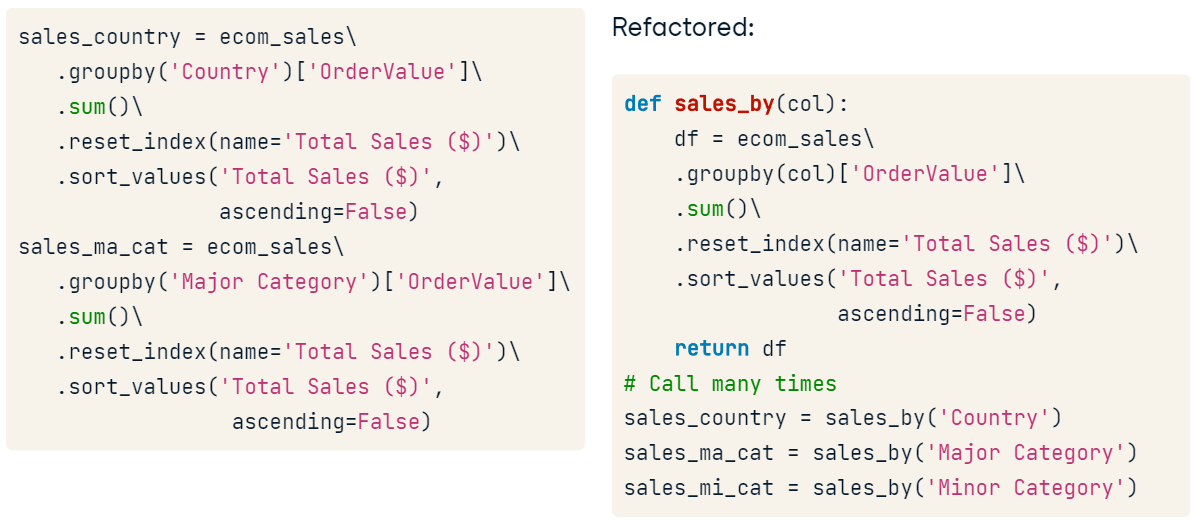

Aquí queremos agregar los datos de ventas por país y sumar el valor del pedido, mientras cambiamos el nombre de la columna agregada y la ordenamod. ¿Qué pasa si queremos hacer algo similar pero agregado por categoría principal? ¿Ves cuánto código es el mismo? Podriamos refactorizar tal como se mira a la derecha de la imagen anterior creando una función para hacer el trabajo, dado un nombre de columna. Ahora podemos llamar a la función en una línea de corta cada vez; ahora incluso podemos agregar por categoría menor.

### DRY en Dash

En Dash, podemos aplicar el principio DRY y refactorizar el código usando las funciones de Python. Esto es importante teniendo en cuenta cuánto tiempo se está volviendo el código de nuestras aplicaciones  Dash. Algunos casos de uso comunes para esto incluyen:
- reutilizar HTML o cualquier otro componente creando una función para generar el componente y agregando un estilo consistente.

Hemos visto cuánto código se puede dedicar a CSS, ya que es bastante complicado. También es más eficiente para actualizar estilos. Ahora solo necesitamos actualizar en un lugar en lugar de muchos.

Consideremos un ejemplo de un logotipo con mucho estilo CSS debido a algunas pautas de diselo corporativo. Mira todo ese CSS! Esto obstruirá nuestra aplicación en poco tiempo si usamos el logotipo varias veces.  En su lugar, creamos una función de Python que devuelva el componente Dash, como se ve aquí. Ahora podemos llamar a esto en el diseño de nuestra aplicación donde queramos el logotipo. se insertará un logotipo perfectamente diseñado donde sea que llamemos a la función. Aquí insertamos el logo tres veces. Ese es un buen código DRY.




In [45]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd
from dash.dependencies import Input, Output

logo_link = 'https://assets.datacamp.com/production/repositories/5893/datasets/fdbe0accd2581a0c505dab4b29ebb66cf72a1803/e-comlogo.png'

def create_logo():
  logo = html.Img(src = logo_link, style = {
      "margin":"30px 0px 0px 0px",
      "padding":"50px 50px",
      "border":"3px dotted lightblue",
      "background-color":"rgb(230, 131, 247)"
  })

  return logo

app = dash.Dash()

app.layout = html.Div([
    create_logo(),
    html.Div(),
    create_logo(),
    dcc.Graph(id = "my_graph"),
    create_logo()
])

if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>

Veamos otro ejemplo. En esta aplicación, parece común usar varios descansos (break) para proporcionar espacio. Vamos a crear una función que devolverá cualquier cantidad de componentes de interrupción HTML de Dash. La función `make_break()` aquí toma un argumento que especifíca cuántos saltos de HTML crear y poner en la lista de adentro. Ahora, dentro del diseño, podemos llamar a la función para que devuelva saltos en línea. Tenga en cuenta la estrella antes de la llamada de función para expandir el resultado en línea. Esto es especialmente útil para devolver una lista de elementos.



In [46]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd
from dash.dependencies import Input, Output

logo_link = 'https://assets.datacamp.com/production/repositories/5893/datasets/fdbe0accd2581a0c505dab4b29ebb66cf72a1803/e-comlogo.png'

app = dash.Dash()

def make_break(num_breaks):
  br_list = [html.Br()]*num_breaks
  return br_list

app.layout = html.Div([
    html.Img(src = logo_link),
    *make_break(2),
    html.H1("Sales breakdowns"),
    *make_break(3)
])

if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

### Reutilización de Estilo

En lugar de crear componentes completos, es posible que deseemos agregar un estilo común. Aquí podemos aprovechar el método de actualización de puntos del diccionario de Python. Veamos un ejemplo. Cuidado, debemos asegurarnos de que las claves de nuestro diccionario sean únicas; de lo contrario, puede haber resultados inesperados. Si tenemos un diccionario de Python, llamar al método de actualización con otro diccionario funsionará los dos. Como puede ver aquí, ahora tenemos un diccionario completo.




In [ ]:
d1 = {"Country":"Australia"}
d2 = {"City":"Sydney"}
d1.update(d2)
print(d1)

{'Country': 'Australia', 'City': 'Sydney'}


### Funciones de Estilo en Dash

Veamos cómo prodríamos implementar esto en Dash. Como antes, primero configuramos una función de Python. Esta función devuelve un diccionario con varias opciones de estilo. ahora necesitamos llamar a la función dentro de nuestro diseño Dash. Aquí, llamamos a la función para usar solo el estilo definido en la función. Esta es una opción. Alternativamente, podemos tener un estilo único para el elemento. Aquí creamos el elemento. Aquí creamos el estilo individual y luego lo actualizamos para incluir el estilo corporativo.

In [47]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd
from dash.dependencies import Input, Output

logo_link = 'https://assets.datacamp.com/production/repositories/5893/datasets/fdbe0accd2581a0c505dab4b29ebb66cf72a1803/e-comlogo.png'

app = dash.Dash()

# Funcion con diccionarios de estilos
def style_c():
  corp_style = {
      "margin":"0 auto",
      "border": "2px solid black",
      "display": "inline-block",
  }
  return corp_style

# Diseño Dash

app.layout = html.Div([
    html.Img(src = logo_link,
             style = style_c()),
    dcc.DatePickerSingle(
        style = {"width":"300px"}.update(style_c())
    )
])

if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>

## Entradas de Usuario en los componentes de Dash

Aprendamos cómo aprovechar las entradas de los usuarios para mejorar la interactividad de nuestras aplicaciones Dash.

### ¿Por qué la entrada del usuario?

Las entradas de los usuarios superan algunas limitaciones de otros elementos interactivos que hemos visto. Podemos permitir que los usuarios ingresen valores numéricos, lo que ayuda para datos con un rango amplio. Imagine un menú despegable con dos mil valores por año. Podemos filtrar según las coincidencias de texto, ya sea exactas o de patrón. Aunque está más allá del alcance de este curso, también podríamos crear una función de inicio de sesión.

### Entrada del usuario en Dash

Las entradas del usuario son un tipo de entrada `Dash_core_components `, alias como `dcc.Input`. Vea el ejemplo aquí


In [48]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd
from dash.dependencies import Input, Output

logo_link = 'https://assets.datacamp.com/production/repositories/5893/datasets/fdbe0accd2581a0c505dab4b29ebb66cf72a1803/e-comlogo.png'

def create_logo():
  logo = html.Img(src = logo_link, style = {
      "margin":"30px 0px 0px 0px",
      "padding":"50px 50px",
      "border":"3px dotted lightblue",
      "background-color":"rgb(230, 131, 247)"
  })

app = dash.Dash()


app.layout = html.Div([
    create_logo(),
    dcc.Input(
    id = "my_input",
    type = "text",
    placeholder = "Enter your text")

])

if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>

Como pudo apreciar, se requiere una identificación, como otros componentes principales, para la integración de devolución de llamada. El tipo predeterminado será texto, pero hay otras opciones que cubriremos. Es una buena idea proporcionar un marcador de posición.

### Usando la entrada

El uso de componentes de entrada de  usuario es similar a otros componentes básicos interactivos. La entrada se convierte en una variable de Python. Esto luego se usa en una devolución de llamada para efectuar algún cambio y regenerar para de la aplicación.

### Tipos de entrada de usuario

Dash tiene una variedad de tipos de entrada de usuario. Algunos son lo que esperamos del nombre. Esto incluye la entrada de texto más general, la entrada de un número y la contraseña común y las entradas de correo electrónico que vemos en los inicios de sesión del sitio web. También hay tipos más especializados, como rango, que crea un control deslizante de rango, y tel y url, que son para números de teléfono y entradas URL de sitios web. También hay tipos de entrada avanzada que están más alla del alcance de este curso y que se pueden usar para la interacción avanzada del navegador.

### Restricción de la entrada del usuario

El argumento de tipo es útil ya que establece automáticamente algunos procedimientos de validación en la entrada del usuario. Por ejemplo, un tipo de correo electrónico requiere un formato de correo electronico estandar. Si no se ingresa, aparece un cuadro rojo alrededor de la entrada y no se realiza la devolución de llamada.




In [49]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd
from dash.dependencies import Input, Output

logo_link = 'https://assets.datacamp.com/production/repositories/5893/datasets/fdbe0accd2581a0c505dab4b29ebb66cf72a1803/e-comlogo.png'

def create_logo():
  logo = html.Img(src = logo_link, style = {
      "margin":"30px 0px 0px 0px",
      "padding":"50px 50px",
      "border":"3px dotted lightblue",
      "background-color":"rgb(230, 131, 247)"
  })

app = dash.Dash()


app.layout = html.Div([
    create_logo(),
    dcc.Input(
    id = "my_input",
    type = "email",
    placeholder = "Enter your email")

])

if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

### Restricciones Adicionales

Podemos controlar aún más la entrada del usuario con argumentos adicionales disponibles para ciertos tipos de entrada. Un tipo de número por defecto solo permite números, pero tiene argumentos adicionales, mínimo y máximos, para establecer los límites numéricos de la entrada. Hay argumentos `minLength `y `maxLength` similares disponibles para entradas de texto. Las entradas de texto también permiten la validación de expresiones regulares, donde la entrada debe coincidir con el patrón de expresiones regulares proporcionado a través del argumento del patrón.

In [50]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd
from dash.dependencies import Input, Output

logo_link = 'https://assets.datacamp.com/production/repositories/5893/datasets/fdbe0accd2581a0c505dab4b29ebb66cf72a1803/e-comlogo.png'

def create_logo():
  logo = html.Img(src = logo_link, style = {
      "margin":"30px 0px 0px 0px",
      "padding":"50px 50px",
      "border":"3px dotted lightblue",
      "background-color":"rgb(230, 131, 247)"
  })

app = dash.Dash()


app.layout = html.Div([
    create_logo(),
    dcc.Input(
    id = "my_input",
    type = "number",
    max = 250)

])

if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

### Cambiar una entrada

También podemos deshabilitar una entrada usando el argumento deshabilitado, potencialmente basado en alguna otra entrada o selección, o  podemos obligar al usuario a usar la entrada usando el argumento requerido. Ambos son argumentos booleanos verdadero/falso para la función dcc.Input.

In [51]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd
from dash.dependencies import Input, Output

logo_link = 'https://assets.datacamp.com/production/repositories/5893/datasets/fdbe0accd2581a0c505dab4b29ebb66cf72a1803/e-comlogo.png'

def create_logo():
  logo = html.Img(src = logo_link, style = {
      "margin":"30px 0px 0px 0px",
      "padding":"50px 50px",
      "border":"3px dotted lightblue",
      "background-color":"rgb(230, 131, 247)"
  })

app = dash.Dash()


app.layout = html.Div([
    create_logo(),
    dcc.Input(
    id = "my_input",
    disabled = True)


])

if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

### Cuando Actualizar

La mayoría de los usuarios estarían familizarizados con agregar alguna entrada, luego presionar `Enter` o hacer click para desencadenar el cambio. Podemos cambiar este comportamiento usando el argumento `debounce`. En este ejemplo, el rebote se ha establecido False.

In [52]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd
from dash.dependencies import Input, Output

logo_link = 'https://assets.datacamp.com/production/repositories/5893/datasets/fdbe0accd2581a0c505dab4b29ebb66cf72a1803/e-comlogo.png'

def create_logo():
  logo = html.Img(src = logo_link, style = {
      "margin":"30px 0px 0px 0px",
      "padding":"50px 50px",
      "border":"3px dotted lightblue",
      "background-color":"rgb(230, 131, 247)"
  })

app = dash.Dash()


app.layout = html.Div([
    create_logo(),
    dcc.Input(id = "my_input", type = "text",
              debounce = False)

])

if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

In [53]:
from google.colab import files
uploaded = files.upload()

Saving ecom_sales.csv to ecom_sales (4).csv


In [54]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd
from dash.dependencies import Input, Output
from datetime import datetime, date
ecom_sales = pd.read_csv('ecom_sales.csv')
logo_link = 'https://assets.datacamp.com/production/repositories/5893/datasets/fdbe0accd2581a0c505dab4b29ebb66cf72a1803/e-comlogo.png'

def make_break(num_breaks):
    br_list = [html.Br()] * num_breaks
    return br_list

def add_logo():
    corp_logo = html.Img(
        src=logo_link,
        style={'margin':'20px 20px 5px 5px',
              'border':'1px dashed lightblue',
              'display':'inline-block'})
    return corp_logo

def style_c():
    layout_style={
        'display':'inline-block',
        'margin':'0 auto',
        'padding':'20px',
    }
    return layout_style


app = dash.Dash(__name__)

app.layout = html.Div([
  add_logo(),
  *make_break(2),
  html.H1('Sales Dashboard'),
  *make_break(3),
  html.Div(
    children=[
    html.Div(
        children=[
        html.H2('Controls', style=style_c()),
        html.H3('Search Descriptions'),
        *make_break(2),
        # Add the required input
        dcc.Input(id='search_desc', type='text',
        placeholder='Filter Product Descriptions',
        # Ensure input is triggered with 'Enter'
        debounce=True,
        # Ensure the plot can load without a selection
        required=False,
        style={'width':'200px', 'height':'30px'})
        ],
        style={'width':'350px', 'height':'350px', 'vertical-align':'top', 'border':'1px solid black',
        'display':'inline-block', 'margin':'0px 80px'}),
    html.Div(children=[
            dcc.Graph(id='sales_desc'),
            html.H2('Sales Quantity by Country',
            style={ 'border':'2px solid black', 'width':'400px', 'margin':'0 auto'})
            ],
             style={'width':'700px','display':'inline-block'}
             ),
    ])
    ],
  style={'text-align':'center', 'display':'inline-block', 'width':'100%'}
  )

@app.callback(
    Output(component_id='sales_desc', component_property='figure'),
    Input(component_id='search_desc', component_property='value')
)
def update_plot(search_value):
    title_value = 'None Selected (Showing all)'

    sales = ecom_sales.copy(deep=True)

    # Undertake the filter here using the user input
    if search_value:
        sales = sales[sales['Description'].str.contains(search_value, case=False)]
        title_value = search_value

    fig = px.scatter(data_frame=sales,
                    y='OrderValue', x='Quantity', color='Country',title=f'Sales with description text: {title_value}')

    return fig


if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [55]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd
from dash.dependencies import Input, Output
from datetime import datetime, date
ecom_sales = pd.read_csv('ecom_sales.csv')
logo_link = 'https://assets.datacamp.com/production/repositories/5893/datasets/fdbe0accd2581a0c505dab4b29ebb66cf72a1803/e-comlogo.png'

def make_break(num_breaks):
    br_list = [html.Br()] * num_breaks
    return br_list

def add_logo():
    corp_logo = html.Img(
        src=logo_link,
        style={'margin':'20px 20px 5px 5px',
              'border':'1px dashed lightblue',
              'display':'inline-block'})
    return corp_logo

def style_c():
    layout_style={
        'display':'inline-block',
        'margin':'0 auto',
        'padding':'20px',
    }
    return layout_style

app = dash.Dash(__name__)

app.layout = html.Div([
  add_logo(),
  *make_break(2),
  html.H1('Sales Dashboard'),
  *make_break(3),
  html.Div(
    children=[
    html.Div(
        children=[
        html.H2('Controls', style=style_c()),
        html.H3('Set minimum OrderValue'),
        *make_break(2),
        dcc.Input(
          # Create the specified input
          id='min_order_val', type='range',
          min=50, max=550, value=50,
          # Ensure the callback is triggered only when the user stops moving the slider
          debounce=False,
        style={'width':'300px', 'height':'30px'})
        ],
        style={'width':'350px', 'height':'350px', 'vertical-align':'top', 'border':'1px solid black',
        'display':'inline-block', 'margin':'0px 80px'}),
    html.Div(children=[
            dcc.Graph(id='sales_country'),
            html.H2('Sales Quantity by Country',
            style={ 'border':'2px solid black', 'width':'400px', 'margin':'0 auto'})
            ],
             style={'width':'700px','display':'inline-block'}
             ),
    ])
    ],
  style={'text-align':'center', 'display':'inline-block', 'width':'100%'}
  )

@app.callback(
    Output(component_id='sales_country', component_property='figure'),
    Input(component_id='min_order_val', component_property='value'))

def update_plot(input_val):

    if not input_val:
      input_val = 0

    sales = ecom_sales.copy(deep=True)

    # Check for input then use to subset data
    if input_val:
        input_val = round(float(input_val), 2)
        sales = sales[sales['OrderValue'] > input_val]

    fig = px.scatter(data_frame=sales, y='OrderValue', height=400,
                     x='Quantity', color='Country',
					 # Set the conditional title
                     title=f'Orders of Min Value ${input_val}')
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>